In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pth_one_layer = "1_layer/err_arr.json"
pth_two_layer = "2_layer/err_arr.json"

err_one_layer = json.load(open(pth_one_layer, "r"))
err_two_layer = json.load(open(pth_two_layer, "r"))

In [4]:
err_one_layer[0]

{'epoch': 0,
 'loss_train': 3.611182689666748,
 'err_train': 0.9685767292976379,
 'loss_test': 3.6356749534606934,
 'err_test': 0.9700884819030762,
 'loss_ood': 3.629537582397461,
 'err_ood': 0.9690476059913635}

In [5]:
def fetch_err_rates(err):
    n = len(err)
    epochs = np.zeros(n)
    id_errs = np.zeros(n)
    ood_errs = np.zeros(n)

    for i, d in enumerate(err):
        epochs[i] = d["epoch"]
        id_errs[i] = d["err_test"]
        ood_errs[i] = d["err_ood"]
    return epochs, id_errs, ood_errs


epochs_one_layer, id_errs_one_layer, ood_errs_one_layer = fetch_err_rates(err_one_layer)
epochs_two_layer, id_errs_two_layer, ood_errs_two_layer = fetch_err_rates(err_two_layer)

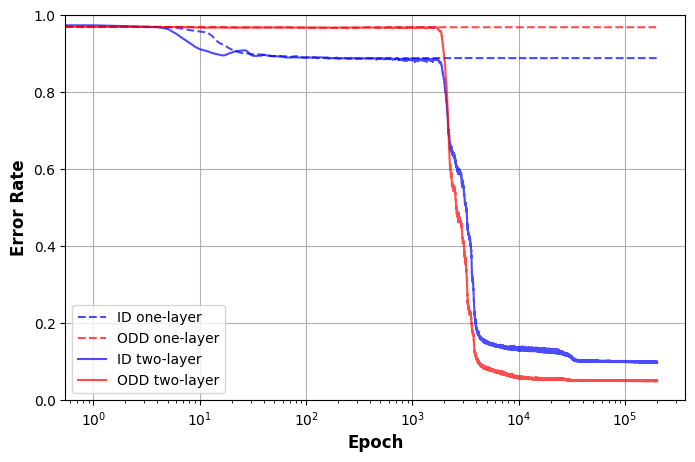

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(
    epochs_one_layer,
    id_errs_one_layer,
    label="ID one-layer",
    linestyle="dashed",
    color="blue",
    alpha=0.7,
)
plt.plot(
    epochs_one_layer,
    ood_errs_one_layer,
    label="ODD one-layer",
    linestyle="dashed",
    color="red",
    alpha=0.7,
)
plt.plot(
    epochs_one_layer,
    id_errs_two_layer,
    label="ID two-layer",
    color="blue",
    alpha=0.7,
)
plt.plot(
    epochs_one_layer,
    ood_errs_two_layer,
    label="ODD two-layer",
    color="red",
    alpha=0.7,
)

plt.xscale("log")
plt.grid(True)
plt.legend()
plt.ylim(0, 1)
plt.xlabel("Epoch", weight="bold", fontsize=12)
plt.ylabel("Error Rate", weight="bold", fontsize=12)
pass